In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('waca_test.csv')

In [4]:
print("Number of entries are : ",data.shape[0])
data.head() # To get view of first 5 data entries

Number of entries are :  85


,No.,Score,Player,Team,Balls,Inns.,Opposing team,Date,Result
0,1,131,"Luckhurst, BrianBrian Luckhurst",England,301,1,Australia,000000001970-12-11-000011 December 1970,Drawn
1,2,171,"Redpath, IanIan Redpath",Australia,372,2,England,000000001970-12-11-000011 December 1970,Drawn
2,3,108,"Chappell, GregGreg Chappell (1/2)",Australia,218,2,England,000000001970-12-11-000011 December 1970,Drawn
3,4,115,"Edrich, JohnJohn Edrich",England,332,3,Australia,000000001970-12-11-000011 December 1970,Drawn
4,5,115,"Edwards, RossRoss Edwards",Australia,252,2,England,000000001974-12-13-000013 December 1974,Won


## 1. Number of centuries scored by each country at WACA

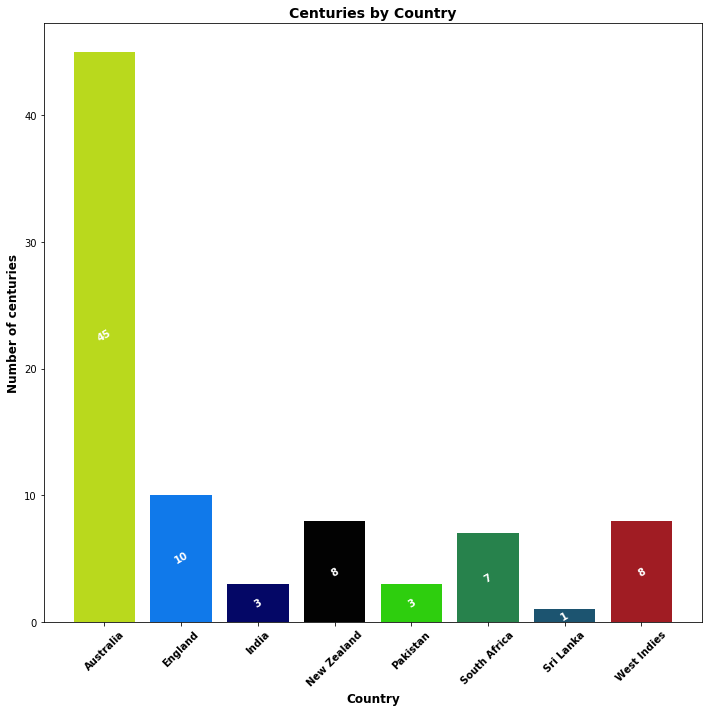

In [23]:
plt.figure(figsize=(10,10)) # Specify the figure size beforehand

# Grouping by Team on basis of count of centuries
df=data[['No.','Team']].groupby(['Team'],as_index=False).count()
y=df['No.']
labels=df['Team']

bar = plt.bar(labels,y,color = ['#b9d91d', '#1079ea', '#040766', '#020202', '#2ece0e', '#27824c', '#1c5470', '#a01c23'])
plt.xticks(labels,rotation=45,fontweight="bold")

# Labelling our plot
plt.title('Centuries by Country',fontsize=14,fontweight="bold")
plt.ylabel('Number of centuries',fontsize=12,fontweight="bold")
plt.xlabel('Country',fontsize=12,fontweight='bold')
plt.tight_layout()


# Displaying value for each bar
for b in bar:
    height = b.get_height()
    #print(b.get_height(),b.get_x(),b.get_width()) get_x() gives starting position of the bar graph
    plt.text(b.get_x()+b.get_width()/2,(height-1)/2,height,ha='center',va='bottom',fontweight="bold",rotation=30,fontsize=10,color="white")
    
plt.show()

**Concluding ,** 

***Some interesting things to note are*** -

   1. Indian batsman and Pakistani batsmen have equal centuries.
   
   2. Non subcontinent nations have more centuries than the subcontinent countries.


# 2. Result when home batsman scores a century

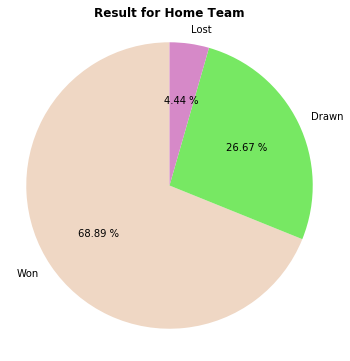

In [64]:
plt.figure(figsize=(5,5))
df=data[['No.','Score','Team','Result']]
total_matches_in_which_centuries_were_scored=df[df.Team=='Australia'].shape[0]
matches_won=len(df[(df.Team=='Australia') & (df.Result=='Won')])
matches_drawn=len(df[(df.Team=='Australia') & (df.Result=='Drawn')])
matches_lost=len(df[(df.Team=='Australia') & (df.Result=='Lost')])
sizes=[matches_won/total_matches_in_which_centuries_were_scored,matches_drawn/total_matches_in_which_centuries_were_scored,matches_lost/total_matches_in_which_centuries_were_scored]
labels=['Won','Drawn','Lost']
plt.pie(sizes,labels=labels,autopct="%.2f %%",colors=['#efd7c4','#77e863','#d689c8'],startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.title("Result for Home Team", fontweight = "bold")
plt.show()

# 2. Result when away batsman scores a century

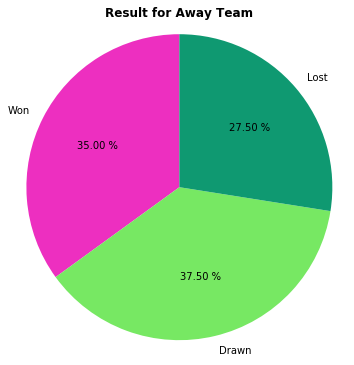

In [66]:
plt.figure(figsize=(5,5))
df=data[['No.','Score','Team','Result']]
total_matches_in_which_centuries_were_scored=df[df.Team!='Australia'].shape[0]
matches_won=len(df[(df.Team!='Australia') & (df.Result=='Won')])
matches_drawn=len(df[(df.Team!='Australia') & (df.Result=='Drawn')])
matches_lost=len(df[(df.Team!='Australia') & (df.Result=='Lost')])
sizes=[matches_won/total_matches_in_which_centuries_were_scored,matches_drawn/total_matches_in_which_centuries_were_scored,matches_lost/total_matches_in_which_centuries_were_scored]
labels=['Won','Drawn','Lost']
plt.pie(sizes,labels=labels,autopct="%.2f %%",colors=['#ed2fc0','#77e863','#0f9971'],startangle=90)
plt.axis('equal')
plt.tight_layout()
plt.title("Result for Away Team", fontweight = "bold")
plt.show()

**Concluding ,** 

***Some interesting things to note are*** -

   1. Once an Aussie scores a century there is ***70 %***  chance of them winning the match.
   
   2. Away team finds it difficult to win the match even after scoring a century just ***35 %***.


#  4. Centuries scored in different innings

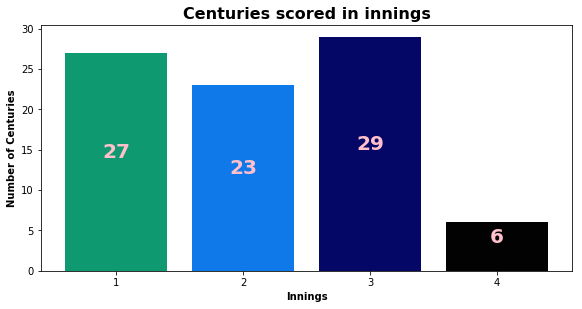

In [181]:
plt.figure(figsize=(8,4))
#data.head()
data[['No.','Inns.']].groupby(['Inns.']).groups
inns_df=data[['No.','Inns.']].groupby(['Inns.'],as_index=False).count()
inns_df
x=inns_df['Inns.']
y=inns_df['No.']
bar = plt.bar(x,y,color = ['#0f9971', '#1079ea', '#040766', '#020202'])
plt.xticks(x)

for b in bar:
    height=b.get_height()
    plt.text(b.get_x()+b.get_width()/2,height/2,height,color="pink",fontweight="bold",ha="center",va="bottom",fontsize=20)

plt.tight_layout()
plt.title("Centuries scored in innings",fontweight="bold",fontsize=16)
plt.xlabel("Innings", fontweight = "bold")
plt.ylabel("Number of Centuries", fontweight = "bold")
plt.show()

**Concluding ,** 

***Some interesting things to note are*** -

   * This is a very interesting trend, as generally the number of hundreds scored goes down with the innings #, but here the number is highest in 3rd innings, maybe due to the Aussie batsmen scoring tons on flat roads to set up big targets in recent times.
   * A good distribution of centuries shows that pitch also does not deteriorate much over the course of the match. (sans 4th innings which is more about temprament)
   * Lesser number of hundreds in the first and second innings also point to the fact that as the match goes on, the pitch becomes less bouncier, and hence easier to bat on.



# 5. Strike rate by innings

In [155]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

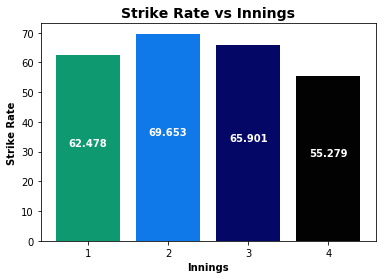

<Figure size 432x288 with 0 Axes>

In [179]:
df=data[['No.','Inns.','Score','Balls']]
df['StrikeRate']=df['Score']/df['Balls'] * 100
df.sort_values('StrikeRate',ascending=False,inplace=True)
sr_df=df[['StrikeRate','Inns.']].groupby(['Inns.'],as_index=False).mean()
x=sr_df['Inns.']
y=sr_df['StrikeRate']
bar=plt.bar([1,2,3,4],y,color = ['#0f9971', '#1079ea', '#040766', '#020202'])
plt.xticks([1,2,3,4])

for b in bar:
    height=b.get_height()
    plt.text(b.get_x()+b.get_width()/2,height/2,round(height,3),color="white",va="bottom",ha="center",fontweight="bold")
    
plt.title("Strike Rate vs Innings", fontsize = 14, fontweight = "bold")
plt.xlabel("Innings", fontweight = "bold")
plt.ylabel("Strike Rate", fontweight = "bold")
plt.show()
plt.tight_layout()
plt.show()

**Concluding ,** 

***Some interesting things to note are*** -

* Strike Rates in the first 3 innings are almost equal, so the conditions to bat remain almost the same in the initial phases of the match.
* It takes a dip in the last innings, which implies that either the conditions get tougher to bat in, or most batsmen play prefer to play out a draw.



# 6. Conversion into big final scores

In [182]:
data.head()

,No.,Score,Player,Team,Balls,Inns.,Opposing team,Date,Result
0,1,131,"Luckhurst, BrianBrian Luckhurst",England,301,1,Australia,000000001970-12-11-000011 December 1970,Drawn
1,2,171,"Redpath, IanIan Redpath",Australia,372,2,England,000000001970-12-11-000011 December 1970,Drawn
2,3,108,"Chappell, GregGreg Chappell (1/2)",Australia,218,2,England,000000001970-12-11-000011 December 1970,Drawn
3,4,115,"Edrich, JohnJohn Edrich",England,332,3,Australia,000000001970-12-11-000011 December 1970,Drawn
4,5,115,"Edwards, RossRoss Edwards",Australia,252,2,England,000000001974-12-13-000013 December 1974,Won


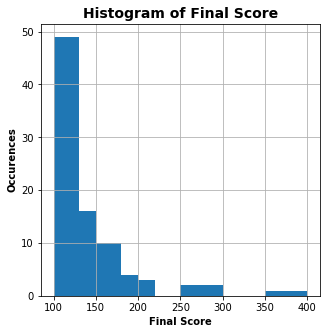

In [190]:
plt.figure(figsize=(5,5))
plt.hist(data.Score,bins=[100,130,150,180,200,220,250,300,350,400])
plt.title("Histogram of Final Score", fontsize = 14, fontweight = "bold")
plt.xlabel("Final Score", fontweight = "bold")
plt.ylabel("Occurences", fontweight = "bold")
plt.grid(True)
plt.show()


* WACA seems to be unfriendly for high scoring innings, as mot scores are between 100-150.
* This is supported by the fact that Hayden's 380 came against a weak Zimbabwe, and the 2 scores between 250-300 were scored in the same match by Ross Taylor and David Warner. So on most occassions, WACA is still a tough wicket to last long on.



In [200]:
sorted(data.Score,reverse=True)[0:6] # Top 6 scores

[380, 290, 253, 219, 203, 200]